## DESCRIPTION

You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

 



 

### Perform the following steps:

1. Understand the dataset:
Identify the shape of the dataset
Identify variables with null values

2. Perform basic data exploratory analysis:

Utilize missing value treatment
Analyze the date column and remove the entries if it has an incorrect timeline
Draw a frequency plot for city-wise complaints
Draw scatter and hexbin plots for complaint concentration across Brooklyn
3. Find major types of complaints:

Plot a bar graph of count vs. complaint types
Find the top 10 types of complaints
Display the types of complaints in each city in a separate dataset
 

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

### Understand the dataset:
Identify the shape of the dataset



Identify variables with null values

In [56]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [57]:
df.shape

(300698, 53)

In [58]:
null_counts={}

for col in df.columns:
    null_count=df[col].isnull().sum()
    null_counts[col]=null_count
    
for col, count in null_counts.items():
    if count > 0:
        print(col, count)

Closed Date 2164
Descriptor 5914
Location Type 131
Incident Zip 2615
Incident Address 44410
Street Name 44410
Cross Street 1 49279
Cross Street 2 49779
Intersection Street 1 256840
Intersection Street 2 257336
Address Type 2815
City 2614
Landmark 300349
Facility Type 2171
Due Date 3
Resolution Action Updated Date 2187
X Coordinate (State Plane) 3540
Y Coordinate (State Plane) 3540
School Region 1
School Code 1
School Zip 1
School or Citywide Complaint 300698
Vehicle Type 300698
Taxi Company Borough 300698
Taxi Pick Up Location 300698
Bridge Highway Name 300455
Bridge Highway Direction 300455
Road Ramp 300485
Bridge Highway Segment 300485
Garage Lot Name 300698
Ferry Direction 300697
Ferry Terminal Name 300696
Latitude 3540
Longitude 3540
Location 3540


##  Perform basic data exploratory analysis:

### Utilize missing value treatment
### Analyze the date column and remove the entries if it has an incorrect timeline
           Draw a frequency plot for city-wise complaints
           Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [59]:

df.isnull().sum()


Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [60]:
# Drop the columns
cols_to_drop = ["School or Citywide Complaint", "Vehicle Type", "Taxi Company Borough", "Taxi Pick Up Location",
                "Bridge Highway Name", "Bridge Highway Direction", "Road Ramp", "Bridge Highway Segment",
                "Garage Lot Name", "Ferry Direction", "Ferry Terminal Name", "Landmark", "Intersection Street 1",
                "Intersection Street 2", "X Coordinate (State Plane)", "Y Coordinate (State Plane)",
                "Cross Street 1", "Cross Street 2"]

df = df.drop(cols_to_drop, axis=1)


In [61]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [62]:
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
Park Facility Name                    0
Park Borough                          0
School Name                           0
School Number                         0
School Region                         1


In [63]:
# replace null values in the "Closed Date" column with the corresponding value in the "Created Date" column
df["Closed Date"].fillna(df["Created Date"], inplace=True)

In [64]:
df['School Name'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: School Name, dtype: int64

In [65]:
df['School Zip'].value_counts()

Unspecified    300697
Name: School Zip, dtype: int64

In [66]:
df['School Number'].value_counts()

Unspecified    300697
Q001                1
Name: School Number, dtype: int64

In [67]:
# Dropping all school related columns as they dont contain any information 

In [68]:

# Drop the columns
cols_to_drop = ["School Name", "School Number", "School Region", "School Code", "School Phone Number",
                "School Address", "School City", "School State", "School Zip", "School Not Found"]

df = df.drop(cols_to_drop, axis=1)


In [69]:
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                           0
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
Park Facility Name                    0
Park Borough                          0
Latitude                           3540
Longitude                          3540
Location                           3540


In [70]:
df['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [71]:
# Maximum null values are treated

In [72]:
# Convert the date columns to datetime format
df["Created Date"] = pd.to_datetime(df["Created Date"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")
df["Closed Date"] = pd.to_datetime(df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

# Filter out rows where Created Date is later than Closed Date
df = df[df["Created Date"] <= df["Closed Date"]]


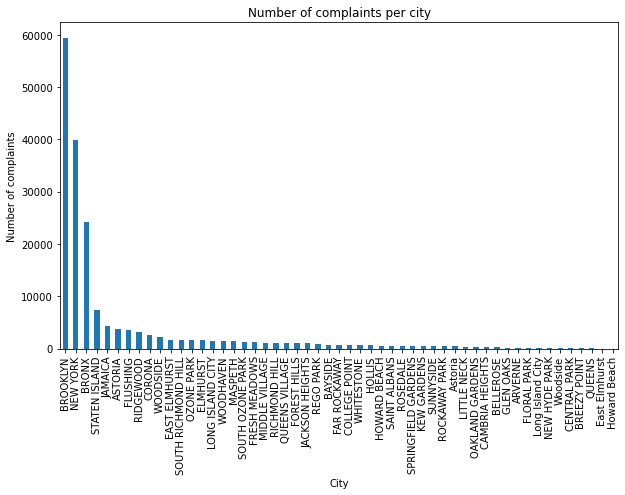

In [73]:

# Count the number of complaints for each city
city_counts = df["City"].value_counts()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind="bar")

# Set the plot title and axis labels
plt.title("Number of complaints per city")
plt.xlabel("City")
plt.ylabel("Number of complaints")

# Show the plot
plt.show()


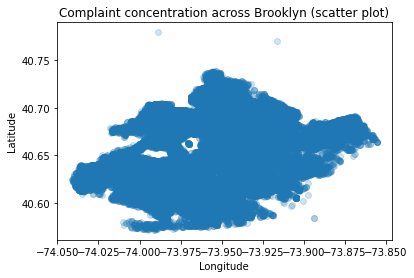

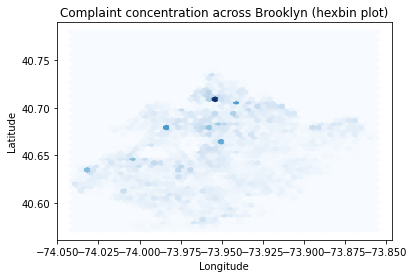

In [74]:
# Filter the dataset to only include complaints from Brooklyn
brooklyn_df = df[df["City"] == "BROOKLYN"]

# Plot the coordinates of each complaint using a scatter plot
plt.scatter(brooklyn_df["Longitude"], brooklyn_df["Latitude"], alpha=0.2)

# Set the plot title and axis labels
plt.title("Complaint concentration across Brooklyn (scatter plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

# Plot the coordinates of each complaint using a hexbin plot
plt.hexbin(brooklyn_df["Longitude"], brooklyn_df["Latitude"], gridsize=50, cmap="Blues")

# Set the plot title and axis labels
plt.title("Complaint concentration across Brooklyn (hexbin plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


## 3. Find major types of complaints:
 ### Plot a bar graph of count vs. complaint types
 ### Find the top 10 types of complaints
 ### Display the types of complaints in each city in a separate dataset


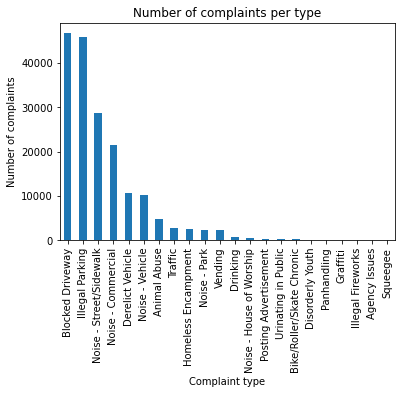

In [75]:


# Count the number of complaints for each complaint type
complaint_counts = df["Complaint Type"].value_counts()

# Plot the results as a bar chart
complaint_counts.plot(kind="bar")

# Set the plot title and axis labels
plt.title("Number of complaints per type")
plt.xlabel("Complaint type")
plt.ylabel("Number of complaints")

# Show the plot
plt.show()


In [76]:
# Find the top 10 types of complaints
top_10_complaints = df["Complaint Type"].value_counts().nlargest(10)

# Print the results
print(top_10_complaints)


Blocked Driveway           46709
Illegal Parking            45880
Noise - Street/Sidewalk    28793
Noise - Commercial         21448
Derelict Vehicle           10693
Noise - Vehicle            10224
Animal Abuse                4731
Traffic                     2800
Homeless Encampment         2670
Noise - Park                2429
Name: Complaint Type, dtype: int64


Text(0, 0.5, 'Number of Complaints')

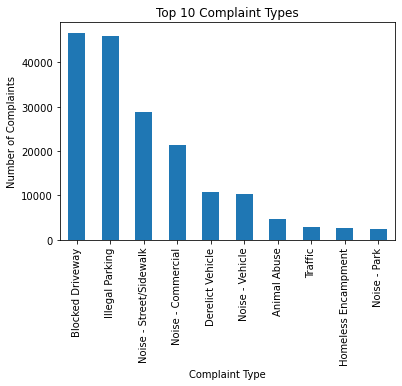

In [77]:
top_10_complaints.plot(kind="bar")
plt.title("Top 10 Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")

In [78]:
# Group the data by city and complaint type
complaints_by_city_type = df.groupby(["City", "Complaint Type"]).size()

# Convert the grouped data to a DataFrame and reset the index
complaints_by_city_type = complaints_by_city_type.to_frame(name="Count").reset_index()

# Print the new dataset
print(complaints_by_city_type)


         City           Complaint Type  Count
0     ARVERNE             Animal Abuse     24
1     ARVERNE         Blocked Driveway     21
2     ARVERNE         Derelict Vehicle     16
3     ARVERNE         Disorderly Youth      2
4     ARVERNE                 Drinking      1
..        ...                      ...    ...
699  WOODSIDE                  Vending      8
700  Woodside         Blocked Driveway      3
701  Woodside          Illegal Parking     56
702  Woodside       Noise - Commercial      2
703  Woodside  Noise - Street/Sidewalk      3

[704 rows x 3 columns]


## Visualize the major types of complaints in each city

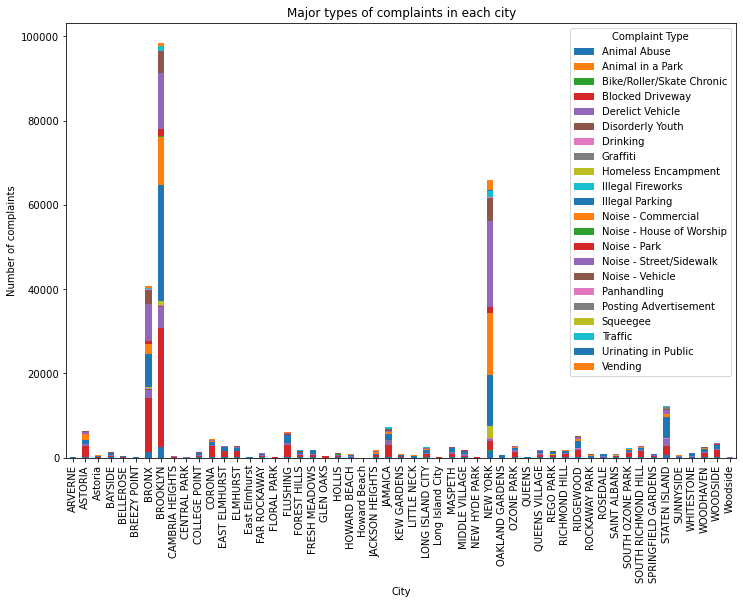

In [79]:
# Create a stacked bar chart of complaint types by city
complaints_by_city.plot(kind="bar", stacked=True, figsize=(12, 8))

# Set the plot title and axis labels
plt.title("Major types of complaints in each city")
plt.xlabel("City")
plt.ylabel("Number of complaints")

# Show the plot
plt.show()


## Check if the average response time across various types of complaints

In [80]:
# Convert the 'Created Date' and 'Closed Date' columns to datetime datatype
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

# Calculate the time elapsed between request creation and request closing
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']


In [81]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
26,32305916,2015-12-31 23:26:41,2015-12-31 23:53:31,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,10031.0,452 WEST 147 STREET,...,The Police Department responded to the complai...,12/31/2015 11:53:31 PM,09 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,40.826102,-73.945663,"(40.826101709196, -73.94566339279595)",0 days 00:26:50
36,32306281,2015-12-31 23:13:47,2015-12-31 23:32:32,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11213.0,1285 ST JOHNS PLACE,...,The Police Department issued a summons in resp...,12/31/2015 11:32:32 PM,08 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN,40.670843,-73.935556,"(40.670842567107634, -73.93555563656233)",0 days 00:18:45
38,32308014,2015-12-31 23:11:33,2015-12-31 23:41:01,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,NaN,...,The Police Department responded to the complai...,12/31/2015 11:41:01 PM,01 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN,40.714007,-73.941715,"(40.714007352909874, -73.94171469793936)",0 days 00:29:28
40,32307354,2015-12-31 23:11:18,2015-12-31 23:16:13,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10017.0,862 2 AVENUE,...,The Police Department responded to the complai...,12/31/2015 11:16:13 PM,06 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,40.752467,-73.970263,"(40.752466784765815, -73.97026303855291)",0 days 00:04:55
41,32308746,2015-12-31 23:10:03,2015-12-31 23:14:04,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,11216.0,95 HALSEY STREET,...,The Police Department responded to the complai...,12/31/2015 11:14:04 PM,03 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN,40.681870,-73.949372,"(40.68186974794423, -73.94937196628798)",0 days 00:04:01


In [82]:
df["Request_Closing_Time"] = pd.to_timedelta(df["Request_Closing_Time"])
df["Request_Closing_Time_sec"] = df["Request_Closing_Time"].apply(lambda x: x.total_seconds())


In [83]:
# Group the dataset by Complaint Type and calculate the mean of Request_Closing_Time_Seconds
response_time_by_type = df.groupby('Complaint Type')['Request_Closing_Time'].mean()

# Print the result
print(response_time_by_type)


Complaint Type
Agency Issues                  0 days 03:24:40.750000
Animal Abuse                0 days 05:08:09.471147748
Bike/Roller/Skate Chronic   0 days 03:51:04.573584905
Blocked Driveway            0 days 04:41:58.489434584
Derelict Vehicle            0 days 07:11:19.946039465
Disorderly Youth            0 days 03:32:48.769633507
Drinking                    0 days 03:50:16.407979407
Graffiti                    0 days 06:43:07.257575757
Homeless Encampment         0 days 04:15:07.907116104
Illegal Fireworks           0 days 02:40:25.732142857
Illegal Parking             0 days 04:22:14.642698343
Noise - Commercial          0 days 03:06:49.834390152
Noise - House of Worship    0 days 03:00:34.485915492
Noise - Park                0 days 03:18:22.091395636
Noise - Street/Sidewalk     0 days 03:27:24.971902893
Noise - Vehicle             0 days 03:36:55.614045383
Panhandling                 0 days 03:37:16.179894179
Posting Advertisement       0 days 01:46:33.890666666
Squeegee     

## Identify significant variables by performing a statistical analysis using p-values and chi-square value

# optional